In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [22]:
df=pd.read_excel('data\\朝阳医院2016年销售数据.xlsx',sheet_name='Sheet1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 7 columns):
购药时间    6576 non-null object
社保卡号    6576 non-null float64
商品编码    6577 non-null float64
商品名称    6577 non-null object
销售数量    6577 non-null float64
应收金额    6577 non-null float64
实收金额    6577 non-null float64
dtypes: float64(5), object(2)
memory usage: 359.8+ KB


In [23]:
df.head()

购药时间          社保卡号      商品编码     商品名称  销售数量   应收金额    实收金额
0  2016-01-01 星期五  1.616528e+06  236701.0  强力VC银翘片   6.0   82.8   69.00
1  2016-01-02 星期六  1.616528e+06  236701.0  清热解毒口服液   1.0   28.0   24.64
2  2016-01-06 星期三  1.260283e+07  236701.0       感康   2.0   16.8   15.00
3  2016-01-11 星期一  1.007034e+10  236701.0    三九感冒灵   1.0   28.0   28.00
4  2016-01-15 星期五  1.015543e+08  236701.0    三九感冒灵   8.0  224.0  208.00

In [24]:
df=df.dropna(how='any',axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6575 entries, 0 to 6577
Data columns (total 7 columns):
购药时间    6575 non-null object
社保卡号    6575 non-null float64
商品编码    6575 non-null float64
商品名称    6575 non-null object
销售数量    6575 non-null float64
应收金额    6575 non-null float64
实收金额    6575 non-null float64
dtypes: float64(5), object(2)
memory usage: 410.9+ KB


In [25]:
df.tail()

购药时间          社保卡号       商品编码 商品名称  销售数量  应收金额   实收金额
6572  2016-04-27 星期三  1.006048e+10  2367011.0  高特灵   1.0   5.6   5.00
6573  2016-04-27 星期三  1.078861e+08  2367011.0  高特灵  10.0  56.0  54.80
6575  2016-04-27 星期三  1.008787e+10  2367011.0  高特灵   2.0  11.2   9.86
6576  2016-04-27 星期三  1.340663e+07  2367011.0  高特灵   1.0   5.6   5.00
6577  2016-04-28 星期四  1.192693e+07  2367011.0  高特灵   2.0  11.2  10.00

In [26]:
buy_time =df['购药时间']
buy_time[:4]

0    2016-01-01 星期五
1    2016-01-02 星期六
2    2016-01-06 星期三
3    2016-01-11 星期一
Name: 购药时间, dtype: object

In [27]:
shebao=df['社保卡号']
shebao[:5]

0    1.616528e+06
1    1.616528e+06
2    1.260283e+07
3    1.007034e+10
4    1.015543e+08
Name: 社保卡号, dtype: float64

In [28]:
df['社保卡号'] = df['社保卡号'].astype(str).str.split('.').str.get(0) # 试试为什么不能转整数？
df[:5]

购药时间         社保卡号      商品编码     商品名称  销售数量   应收金额    实收金额
0  2016-01-01 星期五      1616528  236701.0  强力VC银翘片   6.0   82.8   69.00
1  2016-01-02 星期六      1616528  236701.0  清热解毒口服液   1.0   28.0   24.64
2  2016-01-06 星期三     12602828  236701.0       感康   2.0   16.8   15.00
3  2016-01-11 星期一  10070343428  236701.0    三九感冒灵   1.0   28.0   28.00
4  2016-01-15 星期五    101554328  236701.0    三九感冒灵   8.0  224.0  208.00

In [29]:
# df['实收金额'] = df['实收金额'].astype(int)
df['实收金额'] = df['实收金额'].fillna(-12345678).astype(int)
errors = df[df['实收金额'] == -12345678]
errors

Empty DataFrame
Columns: [购药时间, 社保卡号, 商品编码, 商品名称, 销售数量, 应收金额, 实收金额]
Index: []

In [30]:
dates = df['购药时间'].astype(str).str.split(' ').str.get(0)
df['购药时间'] = pd.to_datetime(dates)
# df.sort(columns='购药时间',inplace=True)
df.sort_values(['购药时间'],inplace=True)
df.head()

购药时间         社保卡号      商品编码           商品名称  销售数量   应收金额  实收金额
0    2016-01-01      1616528  236701.0        强力VC银翘片   6.0   82.8    69
893  2016-01-01     11743428  861405.0  苯磺酸氨氯地平片(络活喜)   1.0   34.5    31
2177 2016-01-01    103283128  861464.0  复方利血平片(复方降压片)   1.0    2.5     2
2178 2016-01-01     12697828  861464.0  复方利血平片(复方降压片)   4.0   10.0     9
1190 2016-01-01  10073966328  861409.0   非洛地平缓释片(波依定)   5.0  162.5   145

In [31]:
# 计算客单价
def average_price(dataframe, col):
    actual_money_sum = pd.Series.sum(dataframe[col])
    cosumer_number = len(dataframe.drop_duplicates(['购药时间','社保卡号']))
    return actual_money_sum / cosumer_number

print(average_price(df, '应收金额'))
print(average_price(df, '实收金额'))

61.508339510748705
56.064677538917714


In [32]:
plt.rcParams['font.sans-serif']=['SimHei'] # 中文设置

In [35]:
drug = df.loc[:,['商品名称','销售数量']]
drug

商品名称  销售数量
0                 强力VC银翘片   6.0
893         苯磺酸氨氯地平片(络活喜)   1.0
2177        复方利血平片(复方降压片)   1.0
2178        复方利血平片(复方降压片)   4.0
1190         非洛地平缓释片(波依定)   5.0
5049       厄贝沙坦氢氯噻嗪片(安博诺)   1.0
5039       马来酸左旋氨氯地平片(玄宁)   1.0
6230        苯磺酸氨氯地平片(络活喜)   2.0
2457        x硝苯地平缓释片(伲福达)   1.0
3888          缬沙坦分散片(易达乐)   1.0
2698        苯磺酸氨氯地平片(安内真)   1.0
1477       酒石酸美托洛尔片(倍他乐克)   1.0
894         苯磺酸氨氯地平片(络活喜)   2.0
1475       酒石酸美托洛尔片(倍他乐克)   2.0
1476       酒石酸美托洛尔片(倍他乐克)   1.0
1903   复方利血平氨苯蝶啶片(北京降压0号)   1.0
4562       厄贝沙坦氢氯噻嗪片(依伦平)   5.0
6482                  开博通   1.0
6481                  开博通   3.0
399                   开博通   5.0
398                   开博通   1.0
4368                卡托普利片   1.0
3436           硝苯地平片(心痛定)   2.0
1306           雷米普利片(瑞素坦)   1.0
264                   心痛定   4.0
5774                珍菊降压片   1.0
3859          硝苯地平控释片(欣然)   6.0
895         苯磺酸氨氯地平片(络活喜)   1.0
2026           吲达帕胺片(寿比山)   2.0
4117       厄贝沙坦氢氯噻嗪片(安博诺)   1.0
...                   ...   ...
2402        复方利血平片(复方降压片)   2.0
4840        苯磺酸氨氯地平片(安内真)   2.0
3195           替米沙坦片(美卡素)   1.0
5882         富马酸比索洛尔片(博苏)   1.0
3280           厄贝沙坦片(安博维)   2.0
3799     G苯磺酸氨氯地平片(6盒/疗程)   6.0
3281           厄贝沙坦片(安博维)   2.0
4464            厄贝沙坦片(吉加)   2.0
2122           吲达帕胺片(寿比山)   2.0
4463            厄贝沙坦片(吉加)   2.0
4462            厄贝沙坦片(吉加)   2.0
865                   开博通   2.0
3744           硝苯地平片(心痛定)   2.0
5339           硝苯地平片(心痛定)   1.0
5990            缬沙坦胶囊(代文)   5.0
4251  KG替米沙坦片(欧美宁)(6盒/疗程)   1.0
2403        复方利血平片(复方降压片)   1.0
2404        复方利血平片(复方降压片)   1.0
861                   开博通   1.0
4283          坎地沙坦酯片(迪之雅)   1.0
5338           硝苯地平片(心痛定)   2.0
4284          坎地沙坦酯片(迪之雅)   4.0
862                   开博通   4.0
4079    G琥珀酸美托洛尔缓释片(倍他乐克)   2.0
3745           硝苯地平片(心痛定)   2.0
4080    G琥珀酸美托洛尔缓释片(倍他乐克)   2.0
864                   开博通   2.0
1432            缬沙坦胶囊(代文)   2.0
56                清热解毒口服液   1.0
863                   开博通   2.0

[6575 rows x 2 columns]

                     销售数量
商品名称                     
苯磺酸氨氯地平片(安内真)      1785.0
开博通                1458.0
酒石酸美托洛尔片(倍他乐克)     1138.0
硝苯地平片(心痛定)          825.0
苯磺酸氨氯地平片(络活喜)       796.0
复方利血平片(复方降压片)       517.0
G琥珀酸美托洛尔缓释片(倍他乐克)   509.0
缬沙坦胶囊(代文)           444.0
非洛地平缓释片(波依定)        375.0
高特灵                 372.0


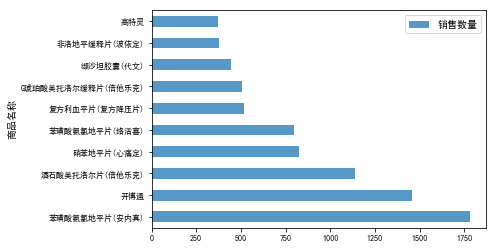

"\ndrug = df.loc[:,['商品名称','销售数量']]\ngrouped = drug.groupby(drug['商品名称'].str[:])\nsales_grouped = grouped['销售数量']\nsales = sales_grouped.sum()\nsales\n"

In [33]:
# 销量排名
drug = df.loc[:,['商品名称','销售数量']]
sales_grouped_by_name = drug.groupby(drug['商品名称'].str[:])['销售数量'].sum()
# select count(sales) from my_table groub by 'name'
sales =pd.Series.to_frame(sales_grouped_by_name)
sales = sales.sort_values(by='销售数量',ascending=False)[:10]
print(sales)
ax = sales.plot.barh(alpha=0.75,rot=0,fontsize=8)
plt.legend(loc='best')
plt.show()
'''
drug = df.loc[:,['商品名称','销售数量']]
grouped = drug.groupby(drug['商品名称'].str[:])
sales_grouped = grouped['销售数量']
sales = sales_grouped.sum()
sales
'''

           num
weekdays      
Sunday     701
Monday     796
Tuesday    732
Wednesday  633
Thurday    986
Friday     808
Saturday   740


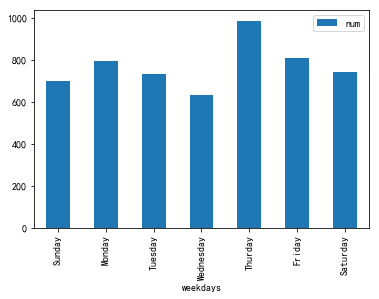

In [36]:
# 每周7天各天各有多少人来医院
date_df =df.drop_duplicates(['购药时间','社保卡号'])
date_df = date_df.loc[:, ['购药时间']]
date_df['num']=1
date_df['weekday'] = date_df['购药时间'].dt.dayofweek
weekday_df = date_df.loc[:, ['weekday','num']]
num_by_weekday = weekday_df.groupby('weekday')['num'].sum()
grouped_weekday_df =pd.Series.to_frame(num_by_weekday)
grouped_weekday_df['weekdays'] = ['Sunday','Monday','Tuesday','Wednesday','Thurday','Friday','Saturday']
grouped_weekday_df = grouped_weekday_df.set_index('weekdays')
print(grouped_weekday_df)
grouped_weekday_df.plot(kind='bar')
plt.show()

In [37]:
date_df =df.drop_duplicates(['购药时间','社保卡号'])
date_df = date_df.loc[:, ['购药时间']]
date_df.head()

购药时间
0    2016-01-01
893  2016-01-01
2177 2016-01-01
2178 2016-01-01
1190 2016-01-01

In [38]:
date_df['weekday'] = date_df['购药时间'].dt.dayofweek
# date_df = date_df['weekday']
date_df.head()

购药时间  weekday
0    2016-01-01        4
893  2016-01-01        4
2177 2016-01-01        4
2178 2016-01-01        4
1190 2016-01-01        4

In [41]:
date_df['weekday']

0       4
893     4
2177    4
2178    4
1190    4
5049    4
5039    4
6230    4
2457    4
3888    4
2698    4
894     4
1903    4
4562    4
6482    4
6481    4
398     4
3436    4
264     4
5774    4
895     4
2026    5
4117    5
5226    5
4937    5
4960    5
2699    5
3149    5
167     5
6422    5
       ..
4077    0
2543    0
860     0
5380    0
3742    0
166     0
4250    0
2401    0
2402    0
4840    0
3195    1
3280    1
3799    1
3281    1
2122    1
4462    1
865     1
3744    1
5990    1
4251    1
2403    1
2404    1
861     1
4283    1
862     1
4079    1
3745    1
4080    1
1432    1
863     1
Name: weekday, Length: 5396, dtype: int64

In [43]:
dow = {0: 'Sunday',
       1: 'Monday',
       2: 'Tuesday',
       3: 'Wednesday',
       4: 'Thurday',
       5: 'Friday',
       6: 'Saturday'}
date_df['weekday'] = list(map(lambda x: dow[x], date_df['weekday'].astype(int)))
date_df['weekday'].value_counts()

Thurday      986
Friday       808
Monday       796
Saturday     740
Tuesday      732
Sunday       701
Wednesday    633
Name: weekday, dtype: int64